**Experiments:**

(i) Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function

(ii) Draw the ROC for only linear and polynomial kernel

(iii) Plot the confusion matrix for which you got the highest accuracy

Linear Kernel Train Accuracy (Multiclass): 53.0000%
Linear Kernel Test Accuracy (Multiclass): 49.0196%
Polynomial Kernel Train Accuracy (Multiclass): 53.0000%
Polynomial Kernel Test Accuracy (Multiclass): 49.0196%
RBF Kernel Train Accuracy (Multiclass): 53.0000%
RBF Kernel Test Accuracy (Multiclass): 49.0196%
Sigmoid Kernel Train Accuracy (Multiclass): 44.0000%
Sigmoid Kernel Test Accuracy (Multiclass): 52.9412%


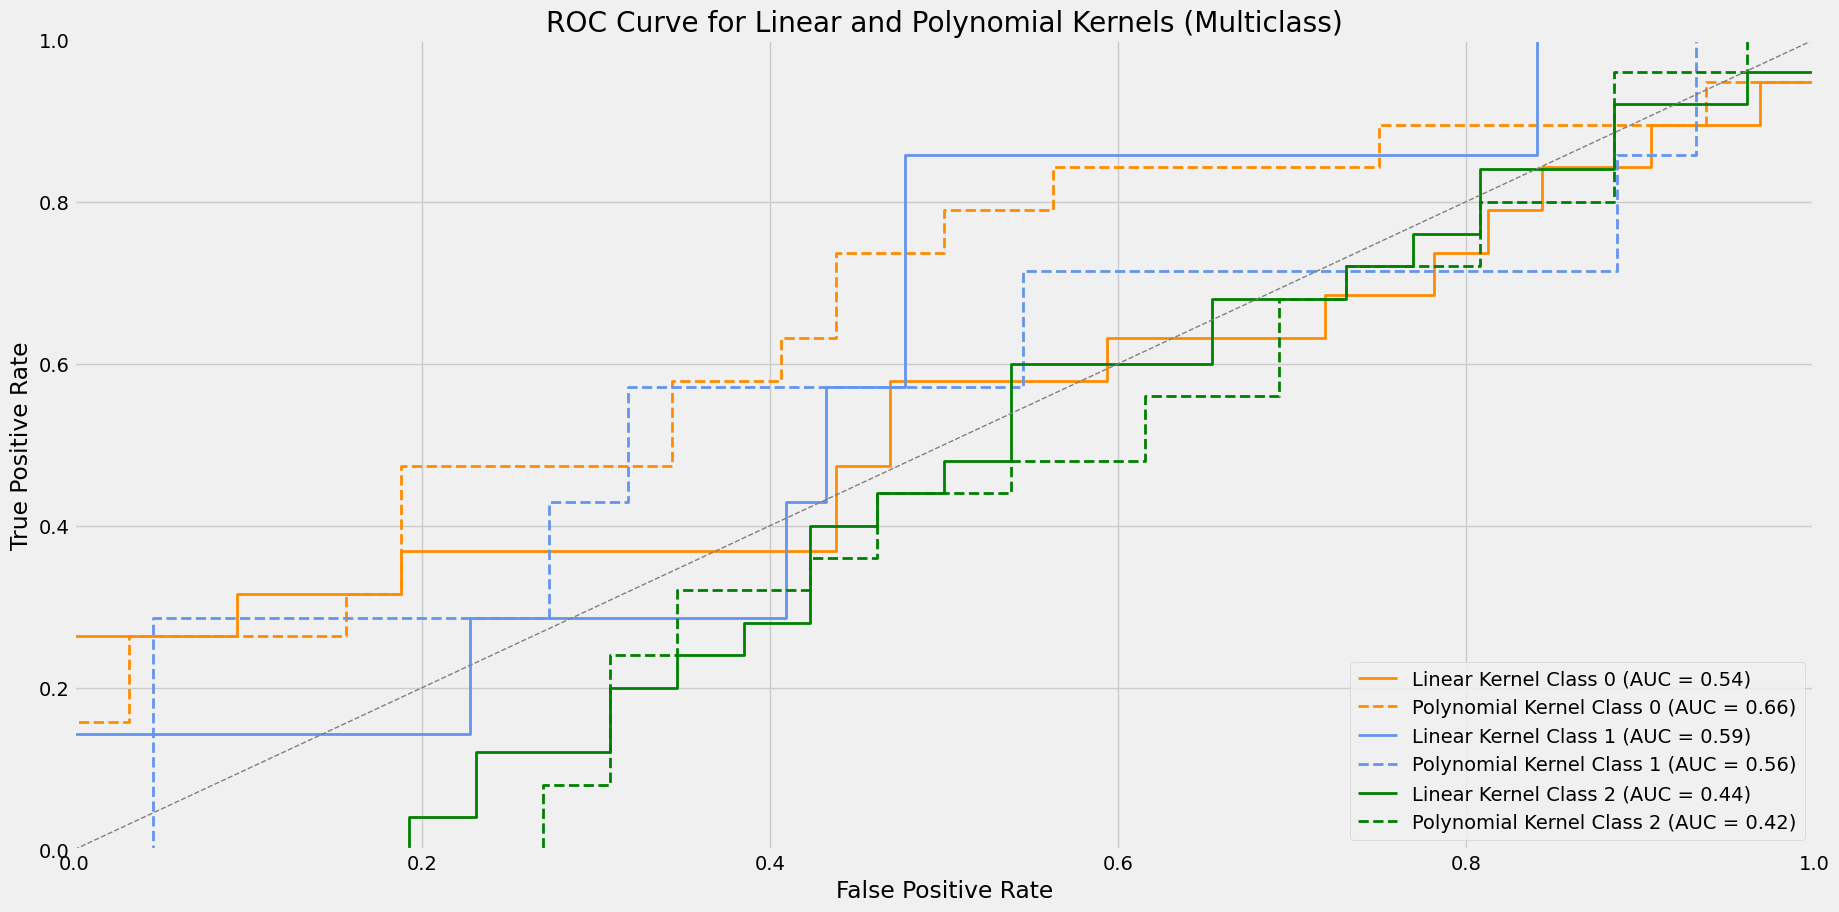


The best kernel is Sigmoid with Test Accuracy: 52.9412%


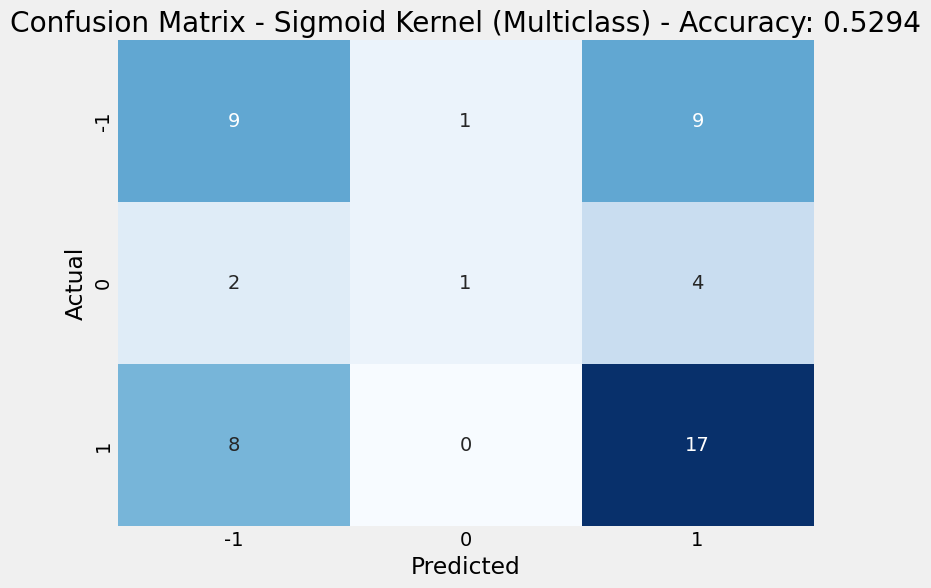

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Df = pd.read_csv('/content/SPY.csv')
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X = Df[['Open-Close','High-Low']]
X.head()

# Target variables (Three classes)
margin = 0.1
y_multiclass = np.where(Df['Close'].shift(-1) > Df['Close'] + margin, 1, np.where(Df['Close'].shift(-1) < Df['Close'] - margin, -1, 0))

split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_multiclass_train = y_multiclass[:split]

# Test data set
X_test = X[split:]
y_multiclass_test = y_multiclass[split:]


# Create and evaluate SVC models with different kernels
# Linear Kernel
svc_linear_multiclass = SVC(kernel='linear', decision_function_shape='ovr').fit(X_train, y_multiclass_train)
accuracy_linear_train_multiclass = accuracy_score(y_multiclass_train, svc_linear_multiclass.predict(X_train))
accuracy_linear_test_multiclass = accuracy_score(y_multiclass_test, svc_linear_multiclass.predict(X_test))
print('Linear Kernel Train Accuracy (Multiclass): {:.4f}%'.format(accuracy_linear_train_multiclass*100))
print('Linear Kernel Test Accuracy (Multiclass): {:.4f}%'.format(accuracy_linear_test_multiclass*100))

# Polynomial Kernel
svc_poly_multiclass = SVC(kernel='poly', decision_function_shape='ovr').fit(X_train, y_multiclass_train)
accuracy_poly_train_multiclass = accuracy_score(y_multiclass_train, svc_poly_multiclass.predict(X_train))
accuracy_poly_test_multiclass = accuracy_score(y_multiclass_test, svc_poly_multiclass.predict(X_test))
print('Polynomial Kernel Train Accuracy (Multiclass): {:.4f}%'.format(accuracy_poly_train_multiclass*100))
print('Polynomial Kernel Test Accuracy (Multiclass): {:.4f}%'.format(accuracy_poly_test_multiclass*100))

# Radial Basis Function (RBF) Kernel
svc_rbf_multiclass = SVC(kernel='rbf', decision_function_shape='ovr').fit(X_train, y_multiclass_train)
accuracy_rbf_train_multiclass = accuracy_score(y_multiclass_train, svc_rbf_multiclass.predict(X_train))
accuracy_rbf_test_multiclass = accuracy_score(y_multiclass_test, svc_rbf_multiclass.predict(X_test))
print('RBF Kernel Train Accuracy (Multiclass): {:.4f}%'.format(accuracy_rbf_train_multiclass*100))
print('RBF Kernel Test Accuracy (Multiclass): {:.4f}%'.format(accuracy_rbf_test_multiclass*100))

# Sigmoid Kernel
svc_sigmoid_multiclass = SVC(kernel='sigmoid', decision_function_shape='ovr').fit(X_train, y_multiclass_train)
accuracy_sigmoid_train_multiclass = accuracy_score(y_multiclass_train, svc_sigmoid_multiclass.predict(X_train))
accuracy_sigmoid_test_multiclass = accuracy_score(y_multiclass_test, svc_sigmoid_multiclass.predict(X_test))
print('Sigmoid Kernel Train Accuracy (Multiclass): {:.4f}%'.format(accuracy_sigmoid_train_multiclass*100))
print('Sigmoid Kernel Test Accuracy (Multiclass): {:.4f}%'.format(accuracy_sigmoid_test_multiclass*100))


# Binarizing the target variable
y_multiclass_bin = label_binarize(y_multiclass_test, classes=[-1, 0, 1])

# Predict probabilities for both models
y_score_linear_multiclass = svc_linear_multiclass.decision_function(X_test)
y_score_poly_multiclass = svc_poly_multiclass.decision_function(X_test)

# Calculate ROC curve and AUC for the linear kernel
fpr_linear_multiclass = dict()
tpr_linear_multiclass = dict()
roc_auc_linear_multiclass = dict()
for i in range(len(np.unique(y_multiclass_test))):
    fpr_linear_multiclass[i], tpr_linear_multiclass[i], _ = roc_curve(y_multiclass_bin[:, i], y_score_linear_multiclass[:, i])
    roc_auc_linear_multiclass[i] = auc(fpr_linear_multiclass[i], tpr_linear_multiclass[i])

# Calculate ROC curve and AUC for the polynomial kernel
fpr_poly_multiclass = dict()
tpr_poly_multiclass = dict()
roc_auc_poly_multiclass = dict()
for i in range(len(np.unique(y_multiclass_test))):
    fpr_poly_multiclass[i], tpr_poly_multiclass[i], _ = roc_curve(y_multiclass_bin[:, i], y_score_poly_multiclass[:, i])
    roc_auc_poly_multiclass[i] = auc(fpr_poly_multiclass[i], tpr_poly_multiclass[i])

# Plot ROC curves for linear and polynomial kernels
plt.figure(figsize=(20, 10))
colors = ['darkorange', 'cornflowerblue', 'green']  # Add more colors if needed
for i in range(len(np.unique(y_multiclass_test))):
    plt.plot(fpr_linear_multiclass[i], tpr_linear_multiclass[i], color=colors[i], lw=2, label=f'Linear Kernel Class {i} (AUC = {roc_auc_linear_multiclass[i]:.2f})')
    plt.plot(fpr_poly_multiclass[i], tpr_poly_multiclass[i], color=colors[i], lw=2, linestyle='--', label=f'Polynomial Kernel Class {i} (AUC = {roc_auc_poly_multiclass[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear and Polynomial Kernels (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# Create a dictionary to store accuracy values for each kernel
kernel_accuracies = {
    "Linear": accuracy_linear_test_multiclass,
    "Polynomial": accuracy_poly_test_multiclass,
    "RBF": accuracy_rbf_test_multiclass,
    "Sigmoid": accuracy_sigmoid_test_multiclass
}

# Find the kernel with the highest accuracy
best_kernel = max(kernel_accuracies, key=kernel_accuracies.get)
best_accuracy = kernel_accuracies[best_kernel]

print(f'\nThe best kernel is {best_kernel} with Test Accuracy: {best_accuracy*100:.4f}%')

# Get predictions for the best model
if best_kernel == 'Linear':
    y_pred_best_kernel = svc_linear_multiclass.predict(X_test)
elif best_kernel == 'Polynomial':
    y_pred_best_kernel = svc_poly_multiclass.predict(X_test)
elif best_kernel == 'RBF':
    y_pred_best_kernel = svc_rbf_multiclass.predict(X_test)
elif best_kernel == 'Sigmoid':
    y_pred_best_kernel = svc_sigmoid_multiclass.predict(X_test)

# Compute confusion matrix for the best kernel
conf_matrix_best_kernel = confusion_matrix(y_multiclass_test, y_pred_best_kernel)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_kernel, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y_multiclass_test), yticklabels=np.unique(y_multiclass_test))
plt.title(f'Confusion Matrix - {best_kernel} Kernel (Multiclass) - Accuracy: {best_accuracy:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The observed test accuracies may appear relatively low; however, it's crucial to consider the dataset's characteristics. In this context, the SVM is tasked with handling a multiclass classification problem involving three distinct classes. It's worth noting that with a larger dataset, we could expect improved results. The performance is contingent on the specific nuances and size of the dataset used in this analysis.